In [1]:
# Importing Data Manipilation Libraries
import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                        filename = 'model.log',
                        filemode = 'w',
                        format = '%(asctime)s - %(levelname)s - %(message)s') 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
logging.info('Data loading started')

In [4]:
# Loading the dataset

url = 'https://raw.githubusercontent.com/mukeshmagar543/CODEB_Internship/refs/heads/main/dataset_phishing.csv'

df = pd.read_csv(url)

df.sample(frac = 1) # Data Shuffle

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
5483,https://luxurylodgesofaustralia.com.au/forward...,108,30,0,3,0,0,1,3,0,4,0,0,0,7,0,2,0,0,0,0,0,0,1,1,0,0.055556,0.0,0,0,0,0,0,3,0,0,1,0,0,0,13,4,2,23,2,23,23,9,6.000000,23.0,4.583333,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,0,1,0,-1,1513583,0,0,4,phishing
2923,https://www.muckrock.com/agency/united-states-...,72,16,0,2,5,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,1,1,0,0,0,0.069444,0.0,0,0,1,0,0,2,0,0,0,0,0,0,10,3,2,3,2,8,8,7,5.000000,5.5,4.875000,0,0,0,0,0,0,81,0.975309,0.024691,0,0,0,0.000000,0,0.000000,0,0,75.000000,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,0,0,203,3814,236842,0,0,5,legitimate
4768,http://www.pingan.com/app_upload/images/info/u...,92,14,1,3,4,0,0,0,0,0,1,0,0,7,0,1,0,0,0,0,1,0,0,0,1,0.271739,0.0,0,0,0,0,0,3,0,0,0,0,0,0,13,4,3,3,3,12,6,12,5.307692,4.5,5.454545,1,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,1,0,2435,8523,22053,0,0,4,legitimate
527,http://www.habfurdo.com/wp-content/plugins/bbp...,89,16,0,2,1,0,0,0,0,0,0,0,0,11,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,1,0,0,0,0,0,11,6,2,3,2,9,8,9,6.090909,5.5,6.222222,6,0,0,0,0,0,13,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.000000,0,0,0,1,1,0,301,2255,0,0,1,3,phishing
10086,http://prehardenelectronically.com/,35,27,0,1,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,23,23,0,23,23,0,23.000000,23.0,0.000000,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,1,1,0,0,343,388,0,0,1,0,phishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,https://www.unsw.co/,20,11,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,4,4,0,3.500000,3.5,0.000000,0,0,0,0,0,0,56,0.857143,0.142857,0,1,0,0.000000,0,0.000000,0,1,75.000000,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,0,0,0,277,1548,0,0,0,2,legitimate
7914,https://real-express.pro/.well-known/helpdesk-...,99,16,0,2,6,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,2,1,0,0,0,0,0,11,4,3,4,3,17,7,17,6.909091,5.5,7.222222,0,0,0,0,0,0,43,0.906977,0.093023,0,0,0,0.500000,0,0.000000,0,0,100.000000,0,100.000000,0.000000,0,0,0,33.333333,0,0,0,1,1,0,31,1064,10419771,0,1,0,phishing
10883,https://steampowerwekst.me/halitz,33,18,0,1,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,6,15,6,15,15

In [6]:
# Checking Data Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
df.isnull().sum()

url                           0
length_url                    0
length_hostname               0
ip                            0
nb_dots                       0
nb_hyphens                    0
nb_at                         0
nb_qm                         0
nb_and                        0
nb_or                         0
nb_eq                         0
nb_underscore                 0
nb_tilde                      0
nb_percent                    0
nb_slash                      0
nb_star                       0
nb_colon                      0
nb_comma                      0
nb_semicolumn                 0
nb_dollar                     0
nb_space                      0
nb_www                        0
nb_com                        0
nb_dslash                     0
http_in_path                  0
https_token                   0
ratio_digits_url              0
ratio_digits_host             0
punycode                      0
port                          0
tld_in_path                   0
tld_in_s

# **The Data is Balanced**

In [8]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [ ]:
# Using Replace to convert data into Numerica
df['status'] = df['status'].replace({'legitimate' : 0, 'phishing' : 1})


In [11]:
# Using Label Encoding in Url column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['url'] = le.fit_transform(df['url'])
df['url'].value_counts()

url
1065     2
4501     1
10779    1
1315     1
9201     1
        ..
6539     1
819      1
9629     1
5956     1
62       1
Name: count, Length: 11429, dtype: int64

# **There is large amount of outliers are present in th dataset**

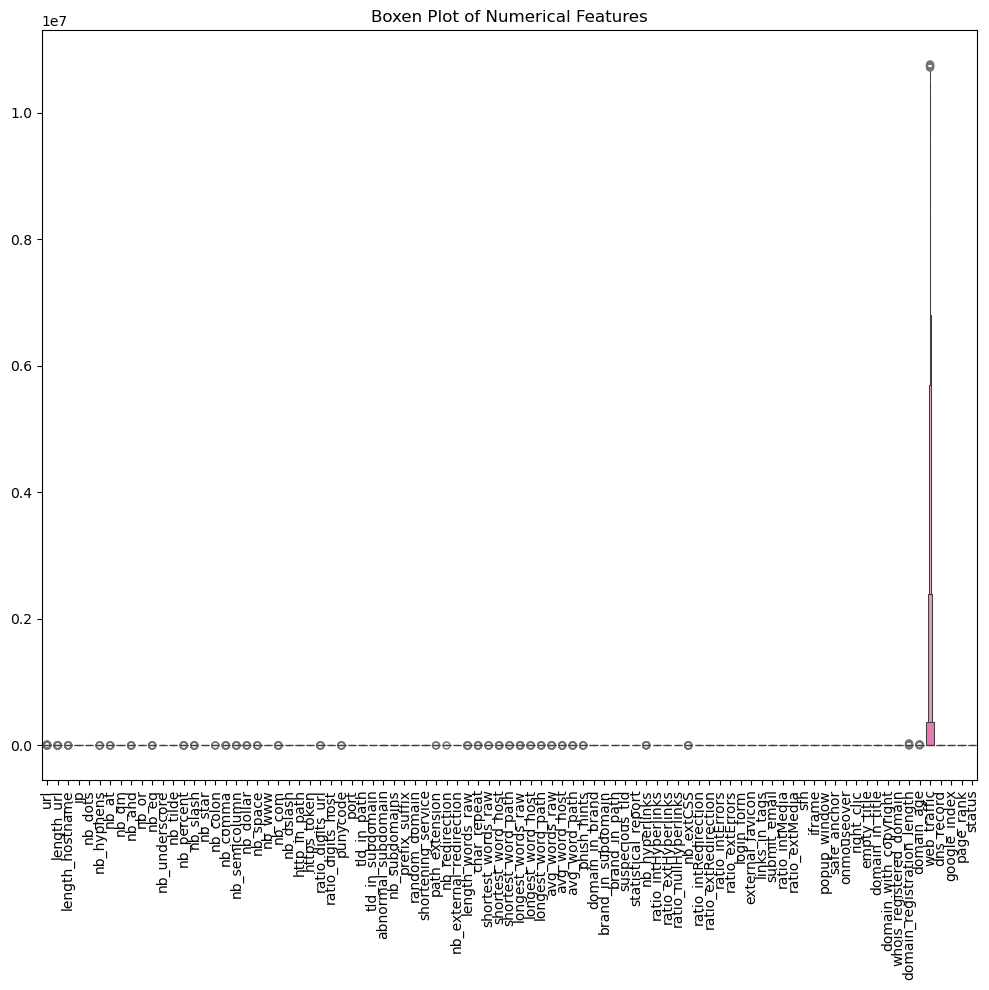

In [12]:
plt.figure(figsize=(10, 10))
sns.boxenplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

In [13]:
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

No outliers found in 'url'.
Replaced 620 outliers in 'length_url' with median.
Replaced 775 outliers in 'length_hostname' with median.
Replaced 1721 outliers in 'ip' with median.
Replaced 567 outliers in 'nb_dots' with median.
Replaced 1371 outliers in 'nb_hyphens' with median.
Replaced 245 outliers in 'nb_at' with median.
Replaced 1555 outliers in 'nb_qm' with median.
Replaced 761 outliers in 'nb_and' with median.
No outliers found in 'nb_or'.
Replaced 1564 outliers in 'nb_eq' with median.
Replaced 1695 outliers in 'nb_underscore' with median.
Replaced 76 outliers in 'nb_tilde' with median.
Replaced 355 outliers in 'nb_percent' with median.
Replaced 401 outliers in 'nb_slash' with median.
Replaced 8 outliers in 'nb_star' with median.
Replaced 197 outliers in 'nb_colon' with median.
Replaced 24 outliers in 'nb_comma' with median.
Replaced 248 outliers in 'nb_semicolumn' with median.
Replaced 11 outliers in 'nb_dollar' with median.
Replaced 210 outliers in 'nb_space' with median.
No out

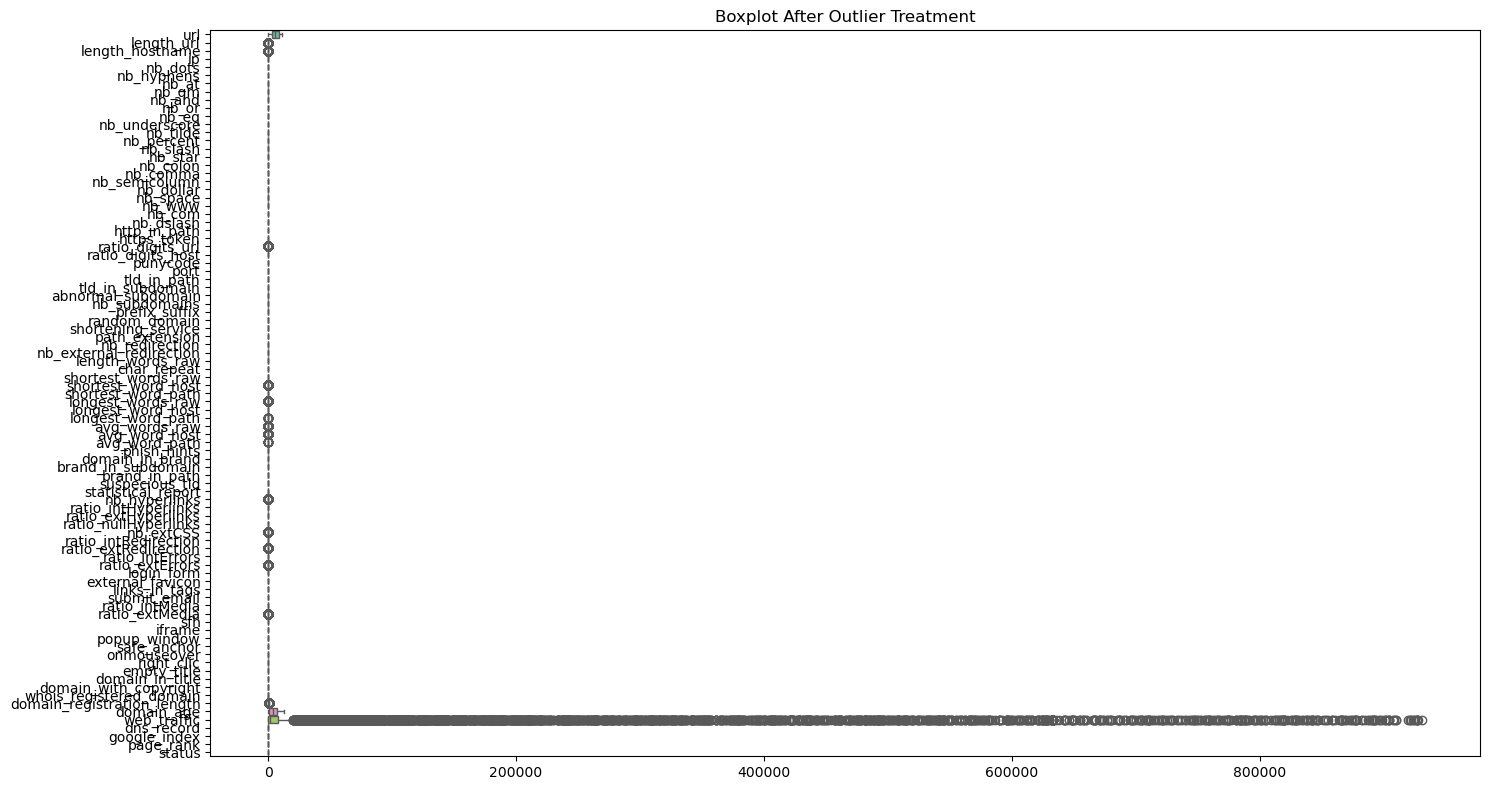

In [14]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [15]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

calculate_vif(df.drop('status',axis = 1))

,features,VIF_Values
0,url,9.42
25,https_token,7.70
47,longest_word_path,5.86
33,nb_subdomains,5.36
46,longest_word_host,5.18
4,nb_dots,4.88
58,ratio_intHyperlinks,4.49
45,longest_words_raw,4.38
21,nb_www,4.21
50,avg_word_path,4.16


In [16]:
# Using PCA Concept:

# Step 1: Standardize the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_scaled = scaler.fit_transform(df)

# Step 2: Determine number of components to retain 90% variance

for i in range(1, df.shape[1] + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    evr = np.cumsum(pca.explained_variance_ratio_)
    if evr[i - 1] >= 0.90:
        pcs = i
        break

print("Explained Variance Ratio:", evr)
print("Number of components selected:", pcs)

# Step 3: Apply PCA

pca = PCA(n_components=pcs)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pcs)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')

pca_df

Explained Variance Ratio: [0.57046592 0.970943  ]
Number of components selected: 2


,PC1,PC2,status
0,-7.873171,-5.366775,0
1,-6.311023,14.559213,1
2,-7.736537,-5.395951,1
3,5.910682,-2.885161,0
4,-6.772865,-5.403439,0
...,...,...,...
11425,-1.094859,73.295599,0
11426,-7.901367,-5.380939,1
11427,-7.912587,-5.342337,0
11428,-7.664649,-5.369196,0


In [17]:
from sklearn.model_selection import train_test_split
X = pca_df.drop(columns= 'status', axis=1)
y = pca_df['status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

y_pred_RF = RF.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score_RF = accuracy_score(y_pred_RF,y_test)
accuracy_score_RF

0.8538932633420823

In [18]:
# Using SGD classifier
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()

SGD.fit(X_train,y_train)

y_pred_SGD = SGD.predict(X_test)
accuracy_score_SGD = accuracy_score(y_pred_SGD,y_test)

accuracy_score_SGD

0.40857392825896766

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, X_train, y_train, cv= 10, scoring= 'accuracy')

print('Accuracy for each fold : ', scores)
print('Average Accuracy across 10 folds : ', np.mean(scores))

Accuracy for each fold :  [0.83169399 0.84699454 0.8557377  0.83825137 0.84026258 0.85886214
 0.84682713 0.83698031 0.84135667 0.85886214]
Average Accuracy across 10 folds :  0.8455828580311129
